In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from PIL import Image
import os 

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


In [5]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd()


In [6]:
print(os.path.join(cur_path,'data' , 'train'))


E:\MiniProject\TraficSignRecognition\data\train


In [ ]:
for i in range(classes):
	path = os.path.join(cur_path,'data','train',str(i))
	images = os.listdir(path)
	print("Entering class " + str(i) +" ........")
	j = 0 
	for a in images:
		j+=1
		if j%1000 == 0:
			print("Completed " + str(j) + " images in " + str(i) + " class." )
		try:
			image = Image.open(path+'\\'+a)
			image  = image.resize((30,30))
			image = np.array(image)
			data.append(image)
			labels.append(i)
		except:
			print("Error Loading Image ... ")

Entering class 0 ........
Entering class 1 ........
Completed 1000 images in 1 class.
Completed 2000 images in 1 class.
Entering class 2 ........
Completed 1000 images in 2 class.
Completed 2000 images in 2 class.
Entering class 3 ........
Completed 1000 images in 3 class.
Entering class 4 ........


In [6]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
labels = np.asarray(labels).astype('float32').reshape((-1,1))
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209, 1)


In [7]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 1) (7842, 1)


In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='sigmoid'))

In [10]:
#Compilation of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 85s 85ms/step - loss: 0.2371 - accuracy: 0.2269 - val_loss: 0.0262 - val_accuracy: 0.8439
Epoch 2/15
981/981 [==============================] - 82s 84ms/step - loss: 0.0384 - accuracy: 0.7197 - val_loss: 0.0133 - val_accuracy: 0.9287
Epoch 3/15
981/981 [==============================] - 78s 80ms/step - loss: 0.0229 - accuracy: 0.8475 - val_loss: 0.0067 - val_accuracy: 0.9638
Epoch 4/15
981/981 [==============================] - 80s 82ms/step - loss: 0.0168 - accuracy: 0.8926 - val_loss: 0.0063 - val_accuracy: 0.9649
Epoch 5/15
981/981 [==============================] - 80s 81ms/step - loss: 0.0129 - accuracy: 0.9207 - val_loss: 0.0049 - val_accuracy: 0.9716
Epoch 6/15
981/981 [==============================] - 79s 80ms/step - loss: 0.0113 - accuracy: 0.9356 - val_loss: 0.0037 - val_accuracy: 0.9778
Epoch 7/15
981/981 [==============================] - 79s 81ms/step - loss: 0.0102 - accuracy: 0.9426 - val_loss: 0.0031 - val_accuracy:

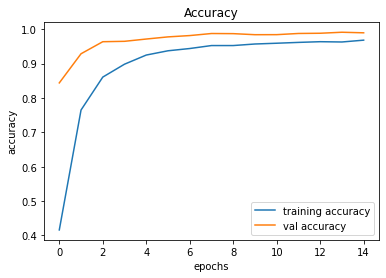

<Figure size 432x288 with 0 Axes>

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('plot1.png')

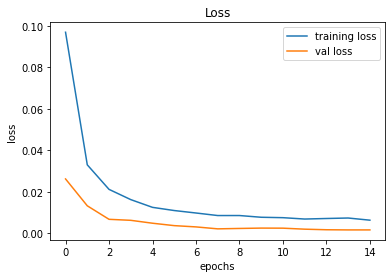

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('plot2.png')

In [20]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred = np.round(pred).astype(int)
pred = pred.tolist()
y_pred = []
for i in pred:
    try:
        y_pred.append(i.index(1))
    except:
        y_pred.append(-1)
# pred = [i.index(1) for i in pred]

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 34, 23, 2, 17, 3, 12, 16, -1, 7, 30, 18, 12, 24, 25, 3, 10, 18, -1, 31, 13, 15, 9, 13, 35, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 26, 2, 5, 28, 11, 25, 11, 34, 5, 12, 1, 10, 25, 25, 21, 33, 25, -1, 10, 35, 3, 7, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, -1, 3, 27, 23, 1, 17, 13, 7, 1, 8, 2, 10, 10, -1, 1, 6, 36, 3, 14, 13, 11, 10, 18, 40, 2, 38, 41, 4, 6, 18, 17, 25, 2, 41, 11, 21, 7, 24, 11, 25, 17, 3, 6, 9, 7, 4, 13, 16, 4, -1, 18, 9, 13, 14, 29, 17, 13, 38, 26, 25, 33, 1, -1, 40, 13, 2, 8, 4, 36, 25, 20, 25, 18, 1, 10, 8, 10, 29, 12, 38, 31, 2, 8, 38, -1, 28, 17, 9, 4, 1, 17, 9, 2, 31, 13, 15, 15, 38, 25, 5, 25, 13, 10, 5, 4, 10, 2, 4, 5, 1, 14, 12, 12, 5, 8, 36, 25, 13, 33, 18, 33, -1, 12, -1, 4, 18, 12, 13, 20, 0, 10, 40, -1, 8, 12, 38, 20, 14, 0, 36, 34, 28, 35, 13, 25, 15, 35, 14, 18, 25, 1, -1, 5, 25, 2, 18, -1, 18

In [31]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print("Accuracy Score" ,accuracy_score(labels, y_pred))

Accuracy Score 0.9479809976247031


In [2]:
model.save("traffic_classifier.h5")

NameError: name 'model' is not defined

In [1]:
from tensorflow.keras.models import load_model
model = load_model('traffic_classifier.h5')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [28]:
print('r2_score:' , r2_score(labels,y_pred))
print('MAE:' , metrics.mean_absolute_error(labels , y_pred) )
print('RMSE:' , np.sqrt(metrics.mean_squared_error(labels,y_pred)))

r2_score: 0.8545821340458495
MAE: 0.8394299287410927
RMSE: 4.5556991010477645
